# use case by Chanan Jacobs

### Call relevant libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_columns', None)
from matplotlib.ticker import FuncFormatter

### format function so can see numbers in data frame in a neat way

In [2]:
def format_df_with_commas(df):
    def format_with_commas(x):
        return '{:,.0f}'.format(x)

    formatted_df = df.iloc[:, 1:].applymap(format_with_commas)
    result_df = pd.concat([df.iloc[:, 0], formatted_df], axis=1)
    return result_df

### upload all data by sheet name

In [3]:
# List of sheet names
sheet_names = ['APAC Head Count', 'APAC Sales', 'APAC Expenses', 'APAC Total IT Spend']

#to store DataFrames
dfs = {}

#load data
for sheet_name in sheet_names:
    df = pd.read_excel('Check point data.xlsx', sheet_name=sheet_name)
    dfs[sheet_name] = df  # Store each DataFrame in the dictionary

for i, sheet_name in enumerate(sheet_names):
    globals()[f'df{i + 1}'] = dfs[sheet_name]

### clean and re-organize head count data

In [4]:
df1a = df1.iloc[:15]
df1b =df1.iloc[16:]
df1b = df1b.dropna(how='all').reset_index(drop=True)
df1b.columns = df1b.iloc[0]
df1b = df1b.iloc[1:]
df1b.reset_index(drop=True, inplace=True)
Head_count = pd.merge(df1a,df1b,on =['Employee Country'],how ="right")

### head count:

In [5]:
print(Head_count.shape)
Head_count

(15, 9)


,Employee Country,Q1-15,Q2-15,Q3-15,Q4-15,Q1-16,Q2-16,Q3-16,Q4-16
0,Australia,59,58,60,62,64,64,63,62
1,China,35,38,33,40,42,40,40,38
2,Hong Kong,18,17,19,18,20,19,18,19
3,India,32,38,41,47,48,47,44,49
4,Indonesia,6,6,6,6,6,6,5,6
5,Japan,26,32,33,34,41,44,41,42
6,Malaysia,3,3,3,3,3,3,3,3
7,New Zealand,6,6,6,6,9,9,9,9
8,Philippines,2,3,2,2,2,2,3,3
9,Singapore,30,31,34,38,42,48,55,54


### clean and re-organize it spend data

In [6]:
df4a = df4.iloc[:13]
df4b =df4.iloc[15:]
df4b.columns = df4b.iloc[1]
df4b = df4b.iloc[2:]
it_spend = pd.merge(df4a,df4b,on =['Country'],how ="right")

### it spend data:

In [7]:
print(it_spend.shape)
it_spend

(14, 7)


,Country,2015 Populations (Millions),2015 GDP ($ Billions),2015 IT Spend ($ Millions),2016 Populations (Millions),2016 GDP ($ Billions),2016 IT Spend ($ Millions)
0,Australia,24,1349,82651,24,1208,84800
1,China,1371,11065,211400,1379,11191,226400
2,Hong Kong,7,309,18154,7,321,18572
3,India,1309,2102,68850,1324,2274,67740
4,Indonesia,258,861,8571,261,932,9600
5,Japan,127,4395,609000,127,4949,627000
6,Malaysia,31,296,14872,31,297,15794
7,New Zealand,5,178,10527,5,189,10790
8,Philippines,102,293,4063,103,305,4400
9,Singapore,6,304,25096,6,310,26200


### sales data:

In [8]:
sales=df2
print(sales.shape)
sales

(7524, 14)


,Channel Country,Sold to Name,Product Type,Product Sub-type,Product Family,Material Classificat,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount
0,Australia,AFINA (CHILE) SISTEMAS INFORMATICOS,1. PRODUCT,1.25 Stand Alone (+HW),4400,APPLIANCE,2482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,AFINA (CHILE) SISTEMAS INFORMATICOS,3. SUPPORT,3.92 Support EBS Premium,ENTERPRISE BASE SUPP,SOFTWARE,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,AFINA (CHILE) SISTEMAS INFORMATICOS,9.5 SERVICE BUNDLE,9.51 3 BLADES PACKAGE,4400,SOFTWARE,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,AFINA (CHILE) SISTEMAS INFORMATICOS,9.6 SERVICE BLADE,9.25 ANTI BOT,SECURITY GATEWAY,SOFTWARE,975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,ALPHAWEST NSW TRADING AS OPTUS BUSI,5. MARKETING,5.10 Events,MARKETING,SOFTWARE,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,9.6 SERVICE BLADE,9.52 7 BLADES PACKAGE,15600,SOFTWARE,NaN,NaN,NaN,NaN,NaN,NaN,74100,NaN
7520,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,9.6 SERVICE BLADE,9.52 7 BLADES PACKAGE,SECURITY GATEWAY,SOFTWARE,NaN,NaN,NaN,NaN,NaN,NaN,4116,NaN
7521,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,9.6 SERVICE BLADE,9.65 IPS,SECURITY GATEWAY,SOFTWARE,0,0,2187,0,0,0,0,13133
7522,Vietnam,M-SECURITY TECHNOLOGY SDN BHD,3. SUPPORT,1.77 Sync. Fees,SYNC. FEES,SOFTWARE,NaN,NaN,NaN,NaN,NaN,460,NaN,NaN


### expenses data:

In [9]:
expenses=df3
print(expenses.shape)
expenses

(133, 29)


,Country,G/L Managerial group,Q1-15 Assigned,Q1-15 Plan,Q1-15 %,Q2-15 Assigned,Q2-15 Plan,Q2-15 %,Q3-15 Assigned,Q3-15 Plan,Q3-15 %,Q4-15 Assigned,Q4-15 Plan,Q4-15 %,Q1-16 Assigned,Q1-16 Plan,Q1-16 %,Q2-16 Assigned,Q2-16 Plan,Q2-16 %,Q3-16 Assigned,Q3-16 Plan,Q3-16 %,Q4-16 Assigned,Q4-16 Plan,Q4-16 %,Overall Result Assigned,Overall Result Plan,Overall Result %
0,Australia,Compensation,2836736,3630228,1,3301299,4061025,1,3298871,5048734,1,3430634,4830330,1,3385249,3835693,1,3675202,4081638,1,3630831,4147712,1,3515393,4173680,1,27074216,33809040,1
1,Australia,Sales,40898,-411,100,60098,3300,18,80907,27166,3,29745,51745,1,12294,41665,0,58114,63577,1,35870,85033,0,54040,31232,2,371967,303307,1
2,Australia,Marketing,116542,81357,1,95060,110000,1,69643,77614,1,107481,59412,2,100192,96000,1,58375,156000,0,131083,166000,1,95414,146000,1,773790,892383,1
3,Australia,COOP & MDF,53963,NaN,NaN,108574,NaN,NaN,47774,NaN,NaN,165196,NaN,NaN,56501,NaN,NaN,72504,NaN,NaN,71940,NaN,NaN,63048,NaN,NaN,639499,NaN,NaN
4,Australia,Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Taiwan,Result,310316,270504,1,380818,362654,1,303474,333008,1,495890,312245,2,395052,341904,1,339115,384156,1,268597,415702,1,448539,601983,1,2941802,3022156,1
129,Thailand,COOP & MDF,25608,NaN,NaN,38789,NaN,NaN,4600,NaN,NaN,17400,NaN,NaN,28250,NaN,NaN,9106,NaN,NaN,51351,NaN,NaN,-28554,NaN,NaN,146550,NaN,NaN
130,Thailand,Result,25608,NaN,NaN,38789,NaN,NaN,4600,NaN,NaN,17400,NaN,NaN,28250,NaN,NaN,9106,NaN,NaN,51351,NaN,NaN,-28554,NaN,NaN,146550,NaN,NaN
131,Vietnam,COOP & MDF,-1552,NaN,NaN,21483,NaN,NaN,1345,NaN,NaN,29154,NaN,NaN,8080,NaN,NaN,29204,NaN,NaN,5880,NaN,NaN,21670,NaN,NaN,115264,NaN,NaN


### the quartes array 

In [10]:
quarters = ['Q1-15', 'Q2-15', 'Q3-15', 'Q4-15', 'Q1-16', 'Q2-16', 'Q3-16', 'Q4-16']

### create array of all columns to group by

In [11]:
columns_to_sum=[]
for quarter in quarters:
    Booked_col = f'{quarter} Booked Amount'
    columns_to_sum.append(Booked_col)

### sum all booked amount to quarter by country (income)

In [12]:
country_sum= sales.groupby('Channel Country')[columns_to_sum].sum().reset_index()
country_sum

,Channel Country,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount
0,Australia,9126852,15628393,15505620,10490510,8297715,19008654,13630455,13840018
1,China,2754516,2788034,3642114,3310420,3258575,3146073,3757800,4161587
2,Hong Kong,2841954,2037812,2837282,4117942,3009109,6258058,3222807,4099353
3,India,7374906,7512036,7179319,6634408,7923857,7945253,8009614,10873627
4,Indonesia,1531164,2082379,1690983,1892150,1601804,1649842,1653837,1986890
5,Japan,5442290,6286630,5515913,5376888,7438962,8775265,9120352,8344142
6,Malaysia,690406,613399,1180275,833491,1432689,532326,754845,1280254
7,New Zealand,1040969,2811715,3654762,2696677,1685724,3468957,2715159,3023868
8,Philippines,718037,1279732,755938,1110287,1370911,1440882,1543800,1194325
9,Singapore,4629364,4435645,5731311,7524770,6453115,5821284,8085223,9485651


#### first i would like to seein a general way how much money each country spends 

### plot all countries income

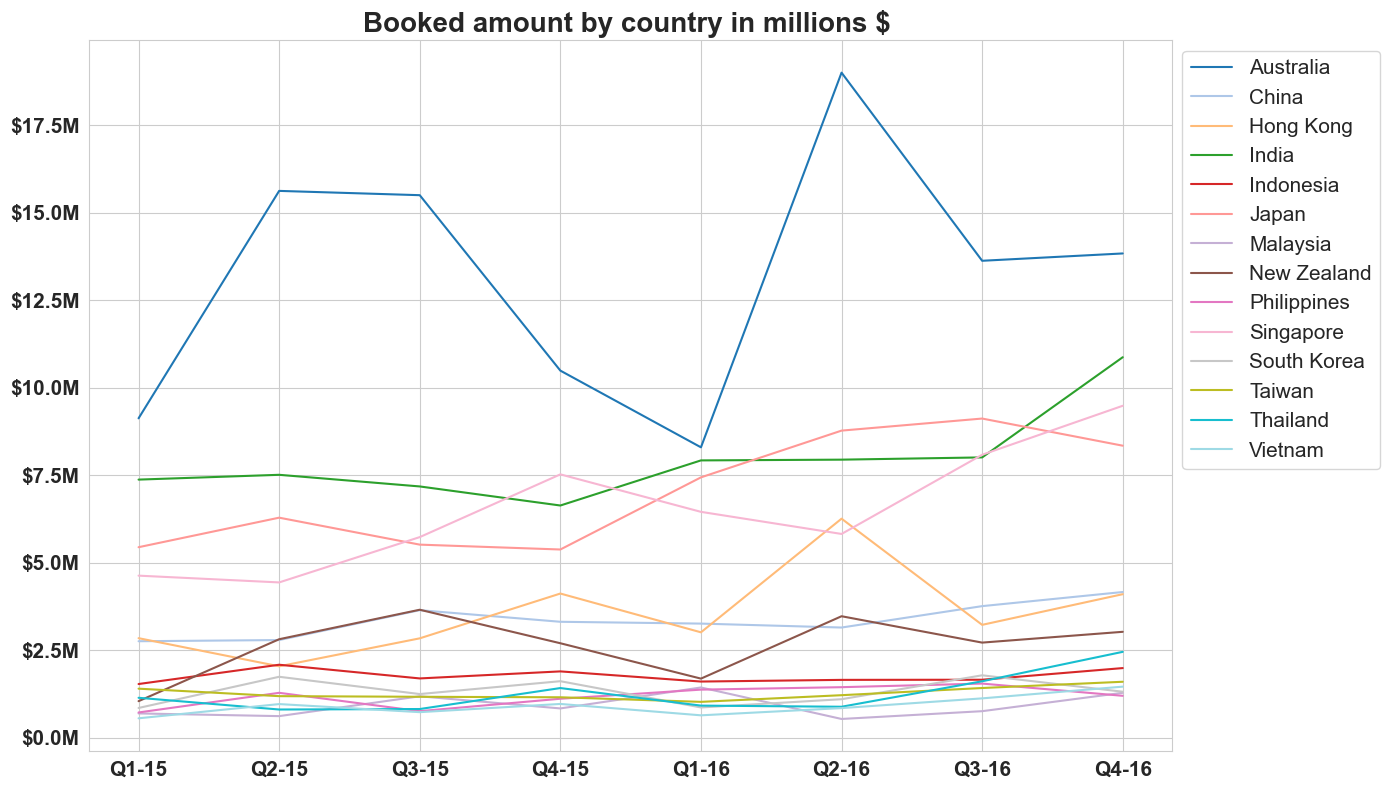

In [13]:
# Define a function to format y-axis labels with dollar signs
def dollar_formatter(x, pos):
    return f"${x/1e6:.1f}M"  # Convert the value to millions and format as $X.XM
formatter = FuncFormatter(dollar_formatter)

#define which data to plot:
df = pd.DataFrame(country_sum)
df.set_index('Channel Country', inplace=True)

#style:
colors = plt.cm.get_cmap('tab20', len(df.index))
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors(np.arange(len(df.index)))]
plt.figure(figsize=(14, 8))

# Plot the data for each country 
for i, country in enumerate(df.index):
    plt.plot(df.columns, df.loc[country], label=country, linestyle='-', color=colors(i))
    
# ticks values:
plt.xticks(range(len(quarters)), quarters, rotation=0, fontsize=15, fontweight='bold')
plt.yticks(fontsize=15,fontweight ='bold')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Booked amount by country in millions $ ', fontsize=20,fontweight ='bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)


plt.grid(True)
plt.tight_layout()
plt.show()

#### 

#### search for ptterns over time, it seems in general that there is a Steady increase in numbers

### countries income disturbution 

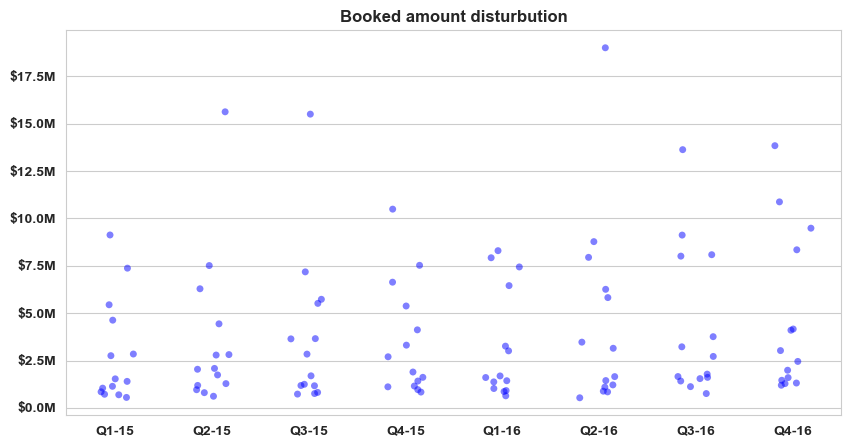

In [14]:
# Create a strip plot (swarm plot) to show each data point individually
plt.figure(figsize=(10, 5))
sns.stripplot(data=country_sum.drop('Channel Country', axis=1), color='blue', jitter=0.2, alpha=0.5)

head = 'Booked amount disturbution'

plt.title(head, fontweight='bold')
plt.xticks(range(len(quarters)), quarters,rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10,fontweight ='bold')

plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

#### 

#### i would like to re- organize data in a way that i can consider what country i should look more deeply in to

### calcualte country average and quarter average

In [15]:
country_sum['average']=country_sum.mean(axis=1)

column_averages = pd.DataFrame(country_sum.mean(axis=0))
column_averages=column_averages.transpose()

result = pd.concat([country_sum, column_averages], ignore_index=True)
column_averages = column_averages.rename(index={0: 'average'})

result.at[14, 'Channel Country'] = 'average'
result = result.sort_values(by='Channel Country', ascending=True)
result=result.reset_index(drop = True)    
result

,Channel Country,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount,average
0,Australia,9126852,15628393,15505620,10490510,8297715,19008654,13630455,13840018,13191027
1,China,2754516,2788034,3642114,3310420,3258575,3146073,3757800,4161587,3352390
2,Hong Kong,2841954,2037812,2837282,4117942,3009109,6258058,3222807,4099353,3553040
3,India,7374906,7512036,7179319,6634408,7923857,7945253,8009614,10873627,7931628
4,Indonesia,1531164,2082379,1690983,1892150,1601804,1649842,1653837,1986890,1761131
5,Japan,5442290,6286630,5515913,5376888,7438962,8775265,9120352,8344142,7037555
6,Malaysia,690406,613399,1180275,833491,1432689,532326,754845,1280254,914711
7,New Zealand,1040969,2811715,3654762,2696677,1685724,3468957,2715159,3023868,2637229
8,Philippines,718037,1279732,755938,1110287,1370911,1440882,1543800,1194325,1176739
9,Singapore,4629364,4435645,5731311,7524770,6453115,5821284,8085223,9485651,6520795


#### 

#### its easy to see that Australia is the main country that provides Checkpoint its income, after it is japan india and singapore

### plot average income by country

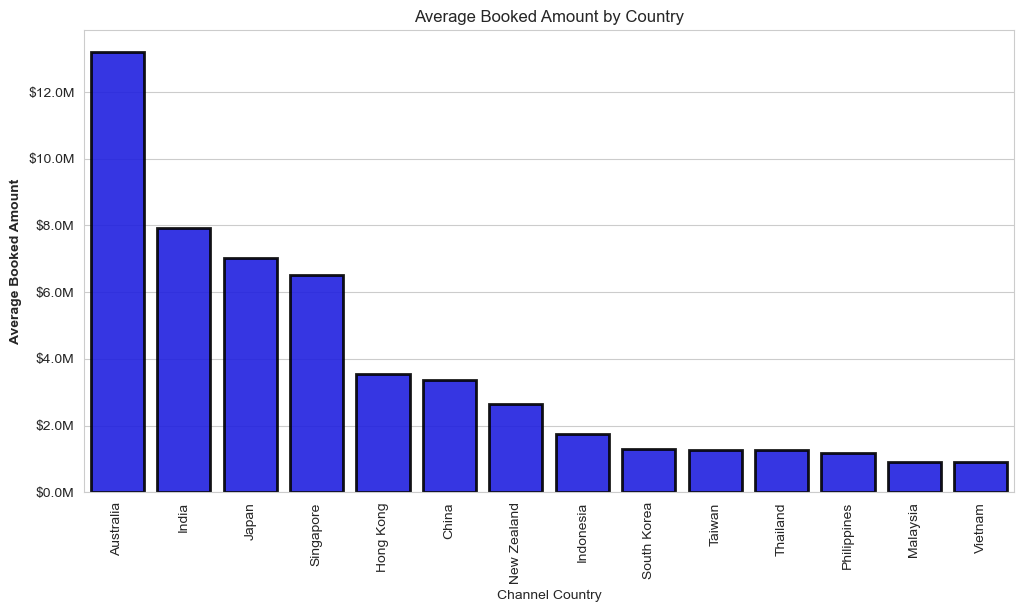

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel Country', y='average', data=country_sum.sort_values(by='average', ascending=False),color='blue',alpha=0.9,linewidth=2, edgecolor='black')
plt.xticks(rotation=90)
plt.title('Average Booked Amount by Country')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel('Average Booked Amount',fontweight ='bold')
plt.show()

#### steady increase in income

### plot average income by quarter

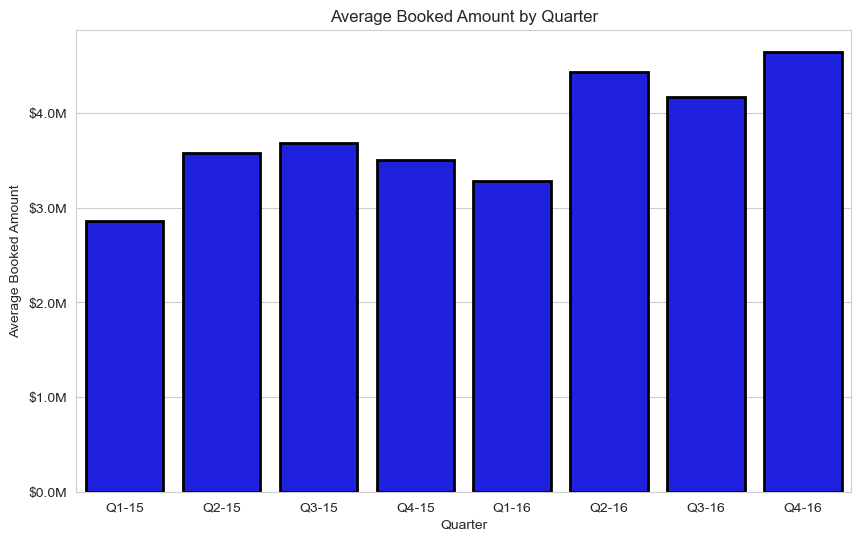

In [17]:
quarterly_averages = result.iloc[14, 1:-1] 

plt.figure(figsize=(10, 6))
sns.barplot(x=quarters, y=quarterly_averages,color='blue',alpha=1,linewidth=2, edgecolor='black')



plt.xticks(rotation=0)
plt.xlabel('Quarter')
plt.ylabel('Average Booked Amount')
plt.title('Average Booked Amount by Quarter')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### plot average income by country pie

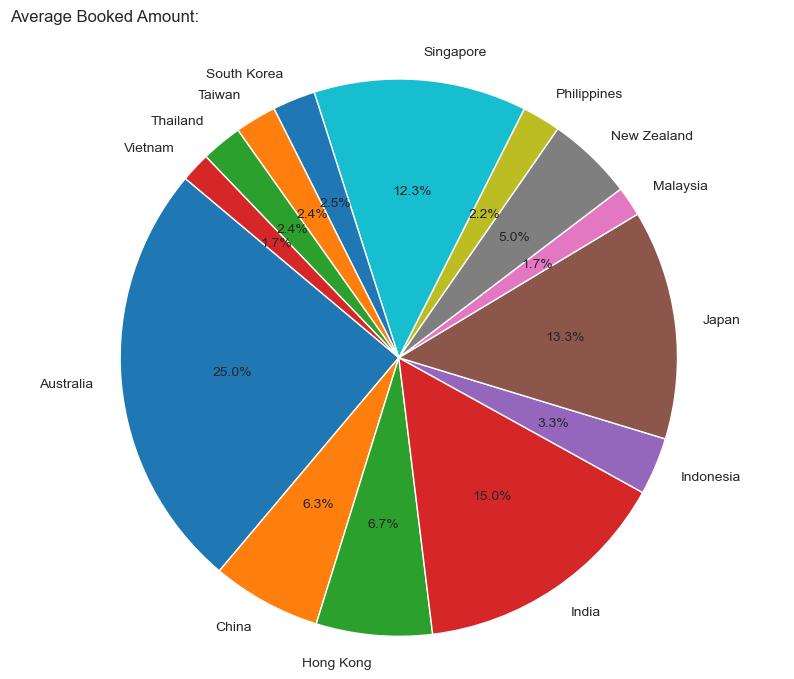

In [18]:
countries = country_sum['Channel Country']
averages = country_sum['average']

# Create a pie plot
plt.figure(figsize=(10, 8))
plt.pie(averages, labels=countries, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Booked Amount: ', loc='left', pad=20)
plt.show()

### top 3 and bottom 3 countries 

In [19]:
toplot=result.sort_values(by='average', ascending=False).drop('average',axis=1)
top3 = toplot.head(3).reset_index(drop=True)
top3.columns = [col.replace('Booked Amount', '') if col != 'Channel Country' else col for col in top3.columns]
toplot=result.drop('average',axis=1)
bottom3 = toplot.tail(4)
bottom3.columns = [col.replace('Booked Amount', '') if col != 'Channel Country' else col for col in bottom3.columns]

In [20]:
top3

,Channel Country,Q1-15,Q2-15,Q3-15,Q4-15,Q1-16,Q2-16,Q3-16,Q4-16
0,Australia,9126852,15628393,15505620,10490510,8297715,19008654,13630455,13840018
1,India,7374906,7512036,7179319,6634408,7923857,7945253,8009614,10873627
2,Japan,5442290,6286630,5515913,5376888,7438962,8775265,9120352,8344142


In [21]:
bottom3

,Channel Country,Q1-15,Q2-15,Q3-15,Q4-15,Q1-16,Q2-16,Q3-16,Q4-16
11,Taiwan,1398195,1184560,1166380,1152229,1021420,1211920,1417067,1595693
12,Thailand,1137785,802677,816400,1415766,914105,881592,1609666,2451321
13,Vietnam,551239,957765,726852,961504,636445,842861,1120837,1456151
14,average,2863161,3582783,3689116,3509209,3278980,4434266,4173013,4650261


### organize Assigned vs planned data:

In [22]:
Assigned_vs_planned=expenses.loc[(expenses['G/L Managerial group']=='Result')]
#reorganize table:
selected_columns = expenses.columns[2:-2]
columns_to_sum = expenses.loc[:, selected_columns]
non_percentage_columns = [col for col in columns_to_sum.columns if not col.endswith('%')]
#sum all columns:

Assigned_vs_planned = Assigned_vs_planned.groupby('Country')[non_percentage_columns].sum().reset_index()
Assigned_vs_planned= Assigned_vs_planned.drop('Overall Result Assigned',axis=1)
Assigned_vs_planned

,Country,Q1-15 Assigned,Q1-15 Plan,Q2-15 Assigned,Q2-15 Plan,Q3-15 Assigned,Q3-15 Plan,Q4-15 Assigned,Q4-15 Plan,Q1-16 Assigned,Q1-16 Plan,Q2-16 Assigned,Q2-16 Plan,Q3-16 Assigned,Q3-16 Plan,Q4-16 Assigned,Q4-16 Plan
0,Australia,3792122,4304593,4027271,5040144,4107898,6091680,4374478,5811348,4099873,4760905,4512433,4909932,4582823,5077196,4216325,4972382
1,China,1524745,794669,1369520,1624444,1688443,1770751,-117286,1453776,1401391,2187838,1721697,1618537,1778212,1691946,1482648,42924
2,Hong Kong,654200,1067402,1111935,1299728,882590,2084343,1758212,1522002,712059,868309,773469,934149,986533,976596,1068818,1005085
3,India,763303,758538,1134185,923719,1170611,1009324,1594401,1070524,1624613,974995,1485179,1340523,1273656,1405112,1223163,1349923
4,Indonesia,18711,0,154260,0,57659,0,80553,0,105724,79732,95212,170488,174098,250931,78866,330580
5,Japan,1629287,2189830,1581289,1921157,1518888,2150425,1702619,2016750,2272267,2030296,2931198,1970709,2771516,2242466,2404168,2006255
6,Korea,279313,377026,393621,408330,419013,434397,455730,504087,463677,412862,422661,468600,249565,487150,398161,511047
7,Malaysia,17535,0,12666,0,3600,0,11336,0,9620,0,7511,0,25050,0,-6814,0
8,New Zealand,23030,0,13950,0,16800,0,37950,0,264720,0,440720,0,567052,0,515731,0
9,Philippines,16239,0,-2625,0,22555,0,22652,0,1625,0,14181,0,49837,0,-1152,0


### assigned vs planned data:

In [23]:
# Calculate the percentage for each quarter and add new columns
for quarter in quarters:
    assigned_col = f'{quarter} Assigned'
    plan_col = f'{quarter} Plan'
    percentage_col = f'{quarter} %'
    Assigned_vs_planned[percentage_col] = (Assigned_vs_planned[assigned_col] / Assigned_vs_planned[plan_col]) * 100

In [24]:
Assigned_vs_planned

,Country,Q1-15 Assigned,Q1-15 Plan,Q2-15 Assigned,Q2-15 Plan,Q3-15 Assigned,Q3-15 Plan,Q4-15 Assigned,Q4-15 Plan,Q1-16 Assigned,Q1-16 Plan,Q2-16 Assigned,Q2-16 Plan,Q3-16 Assigned,Q3-16 Plan,Q4-16 Assigned,Q4-16 Plan,Q1-15 %,Q2-15 %,Q3-15 %,Q4-15 %,Q1-16 %,Q2-16 %,Q3-16 %,Q4-16 %
0,Australia,3792122,4304593,4027271,5040144,4107898,6091680,4374478,5811348,4099873,4760905,4512433,4909932,4582823,5077196,4216325,4972382,88,80,67,75,86,92,90,85
1,China,1524745,794669,1369520,1624444,1688443,1770751,-117286,1453776,1401391,2187838,1721697,1618537,1778212,1691946,1482648,42924,192,84,95,-8,64,106,105,3454
2,Hong Kong,654200,1067402,1111935,1299728,882590,2084343,1758212,1522002,712059,868309,773469,934149,986533,976596,1068818,1005085,61,86,42,116,82,83,101,106
3,India,763303,758538,1134185,923719,1170611,1009324,1594401,1070524,1624613,974995,1485179,1340523,1273656,1405112,1223163,1349923,101,123,116,149,167,111,91,91
4,Indonesia,18711,0,154260,0,57659,0,80553,0,105724,79732,95212,170488,174098,250931,78866,330580,inf,inf,inf,inf,133,56,69,24
5,Japan,1629287,2189830,1581289,1921157,1518888,2150425,1702619,2016750,2272267,2030296,2931198,1970709,2771516,2242466,2404168,2006255,74,82,71,84,112,149,124,120
6,Korea,279313,377026,393621,408330,419013,434397,455730,504087,463677,412862,422661,468600,249565,487150,398161,511047,74,96,96,90,112,90,51,78
7,Malaysia,17535,0,12666,0,3600,0,11336,0,9620,0,7511,0,25050,0,-6814,0,inf,inf,inf,inf,inf,inf,inf,-inf
8,New Zealand,23030,0,13950,0,16800,0,37950,0,264720,0,440720,0,567052,0,515731,0,inf,inf,inf,inf,inf,inf,inf,inf
9,Philippines,16239,0,-2625,0,22555,0,22652,0,1625,0,14181,0,49837,0,-1152,0,inf,-inf,inf,inf,inf,inf,inf,-inf


### some countries didnt planned a budget at all

In [25]:
selected_columns = [Assigned_vs_planned.columns[0]] + Assigned_vs_planned.columns[-8:].tolist()
Assigned_vs_planned[selected_columns]

,Country,Q1-15 %,Q2-15 %,Q3-15 %,Q4-15 %,Q1-16 %,Q2-16 %,Q3-16 %,Q4-16 %
0,Australia,88,80,67,75,86,92,90,85
1,China,192,84,95,-8,64,106,105,3454
2,Hong Kong,61,86,42,116,82,83,101,106
3,India,101,123,116,149,167,111,91,91
4,Indonesia,inf,inf,inf,inf,133,56,69,24
5,Japan,74,82,71,84,112,149,124,120
6,Korea,74,96,96,90,112,90,51,78
7,Malaysia,inf,inf,inf,inf,inf,inf,inf,-inf
8,New Zealand,inf,inf,inf,inf,inf,inf,inf,inf
9,Philippines,inf,-inf,inf,inf,inf,inf,inf,-inf


### leave just assigned data:

In [26]:
assigned_columns = [col for col in Assigned_vs_planned.columns if col.endswith("Assigned")]

# Include the "Country" column in the list
selected_columns = ['Country'] + assigned_columns

assigned_data = Assigned_vs_planned[selected_columns]
assigned_data

,Country,Q1-15 Assigned,Q2-15 Assigned,Q3-15 Assigned,Q4-15 Assigned,Q1-16 Assigned,Q2-16 Assigned,Q3-16 Assigned,Q4-16 Assigned
0,Australia,3792122,4027271,4107898,4374478,4099873,4512433,4582823,4216325
1,China,1524745,1369520,1688443,-117286,1401391,1721697,1778212,1482648
2,Hong Kong,654200,1111935,882590,1758212,712059,773469,986533,1068818
3,India,763303,1134185,1170611,1594401,1624613,1485179,1273656,1223163
4,Indonesia,18711,154260,57659,80553,105724,95212,174098,78866
5,Japan,1629287,1581289,1518888,1702619,2272267,2931198,2771516,2404168
6,Korea,279313,393621,419013,455730,463677,422661,249565,398161
7,Malaysia,17535,12666,3600,11336,9620,7511,25050,-6814
8,New Zealand,23030,13950,16800,37950,264720,440720,567052,515731
9,Philippines,16239,-2625,22555,22652,1625,14181,49837,-1152


###  

### leave just booked data:

In [27]:
booked_data = result.rename(columns={result.columns[0]: "Country"})
booked_data=booked_data.sort_values(by='Country', ascending=True).reset_index(drop=True)
booked_data

,Country,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount,average
0,Australia,9126852,15628393,15505620,10490510,8297715,19008654,13630455,13840018,13191027
1,China,2754516,2788034,3642114,3310420,3258575,3146073,3757800,4161587,3352390
2,Hong Kong,2841954,2037812,2837282,4117942,3009109,6258058,3222807,4099353,3553040
3,India,7374906,7512036,7179319,6634408,7923857,7945253,8009614,10873627,7931628
4,Indonesia,1531164,2082379,1690983,1892150,1601804,1649842,1653837,1986890,1761131
5,Japan,5442290,6286630,5515913,5376888,7438962,8775265,9120352,8344142,7037555
6,Malaysia,690406,613399,1180275,833491,1432689,532326,754845,1280254,914711
7,New Zealand,1040969,2811715,3654762,2696677,1685724,3468957,2715159,3023868,2637229
8,Philippines,718037,1279732,755938,1110287,1370911,1440882,1543800,1194325,1176739
9,Singapore,4629364,4435645,5731311,7524770,6453115,5821284,8085223,9485651,6520795


In [28]:
result=result.reset_index(drop=True)
result.rename(columns={'Channel Country': 'Country'}, inplace=True)

###  

### ROI

In [29]:
merge_roi = result.merge(assigned_data, on='Country')
#(south korea and average dropped)

for quarter in quarters:
    Booked_col = f'{quarter} Booked Amount'
    Assigned_col = f'{quarter} Assigned'
    percentage_col = f'{quarter} %'
    merge_roi[percentage_col] = (merge_roi[Booked_col] / merge_roi[Assigned_col]) *100
    
selected_columns = [merge_roi.columns[0]] + merge_roi.columns[-8:].tolist()
merge_roi[selected_columns]

,Country,Q1-15 %,Q2-15 %,Q3-15 %,Q4-15 %,Q1-16 %,Q2-16 %,Q3-16 %,Q4-16 %
0,Australia,241,388,377,240,202,421,297,328
1,China,181,204,216,-2823,233,183,211,281
2,Hong Kong,434,183,321,234,423,809,327,384
3,India,966,662,613,416,488,535,629,889
4,Indonesia,8183,1350,2933,2349,1515,1733,950,2519
5,Japan,334,398,363,316,327,299,329,347
6,Malaysia,3937,4843,32785,7353,14893,7087,3013,-18789
7,New Zealand,4520,20156,21755,7106,637,787,479,586
8,Philippines,4422,-48752,3352,4901,84364,10161,3098,-103674
9,Singapore,258,201,310,371,289,224,248,291


In [30]:
merge_plot=merge_roi[selected_columns]
merge_roi[selected_columns]

,Country,Q1-15 %,Q2-15 %,Q3-15 %,Q4-15 %,Q1-16 %,Q2-16 %,Q3-16 %,Q4-16 %
0,Australia,241,388,377,240,202,421,297,328
1,China,181,204,216,-2823,233,183,211,281
2,Hong Kong,434,183,321,234,423,809,327,384
3,India,966,662,613,416,488,535,629,889
4,Indonesia,8183,1350,2933,2349,1515,1733,950,2519
5,Japan,334,398,363,316,327,299,329,347
6,Malaysia,3937,4843,32785,7353,14893,7087,3013,-18789
7,New Zealand,4520,20156,21755,7106,637,787,479,586
8,Philippines,4422,-48752,3352,4901,84364,10161,3098,-103674
9,Singapore,258,201,310,371,289,224,248,291


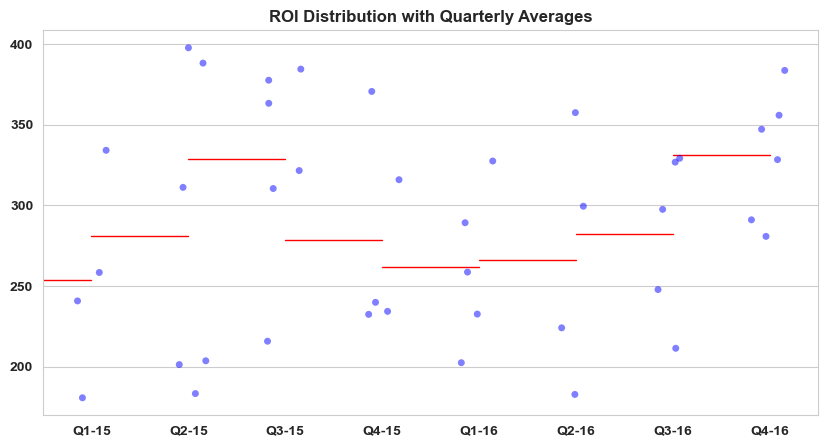

In [31]:
filtered_data = merge_plot.drop('Country', axis=1)
filtered_data = filtered_data[(filtered_data >= -400) & (filtered_data <= 400)]

# Define the quarters for x-axis labels
quarters = ['Q1-15', 'Q2-15', 'Q3-15', 'Q4-15', 'Q1-16', 'Q2-16', 'Q3-16', 'Q4-16']

# Calculate the mean for each quarter
means = filtered_data.mean()

# Create a strip plot
plt.figure(figsize=(10, 5))
sns.stripplot(data=filtered_data, color='blue', jitter=0.2, alpha=0.5)

# Plotting the average line for each quarter
for i, mean in enumerate(means):
    plt.axhline(y=mean, color='red', linestyle='-', linewidth=1, xmin=i/len(means)-1/(2*len(means)), xmax=(i+1)/len(means)-1/(2*len(means)))

# Set title and labels
head = 'ROI Distribution with Quarterly Averages'
plt.title(head, fontweight='bold')
plt.xticks(range(len(quarters)), quarters, rotation=0, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Show the plot
plt.show()

###  

### average it spend for person:

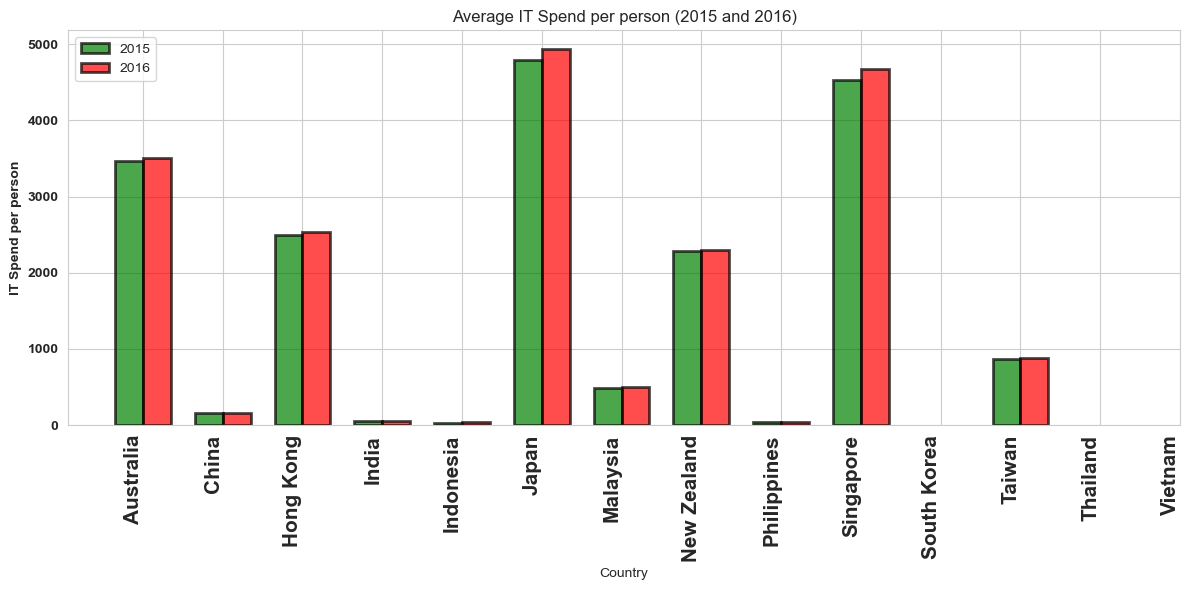

,Country,2015 Populations (Millions),2015 GDP ($ Billions),2015 IT Spend ($ Millions),2016 Populations (Millions),2016 GDP ($ Billions),2016 IT Spend ($ Millions),2015 IT Spend per Capita,2016 IT Spend per Capita,average_it_spend,average_population
0,Australia,24,1349,82651,24,1208,84800,3465,3503,3484,24
1,China,1371,11065,211400,1379,11191,226400,154,164,159,1375
2,Hong Kong,7,309,18154,7,321,18572,2490,2531,2511,7
3,India,1309,2102,68850,1324,2274,67740,53,51,52,1317
4,Indonesia,258,861,8571,261,932,9600,33,37,35,260
5,Japan,127,4395,609000,127,4949,627000,4790,4937,4864,127
6,Malaysia,31,296,14872,31,297,15794,484,506,495,31
7,New Zealand,5,178,10527,5,189,10790,2291,2299,2295,5
8,Philippines,102,293,4063,103,305,4400,40,43,41,103
9,Singapore,6,304,25096,6,310,26200,4534,4672,4603,6


In [32]:
df = pd.DataFrame(it_spend)
# Calculate average IT spending per capita for 2015 and 2016
df['2015 IT Spend per Capita'] = df['2015 IT Spend ($ Millions)'] / (df['2015 Populations (Millions)'] * 1)
df['2016 IT Spend per Capita'] = df['2016 IT Spend ($ Millions)'] / (df['2016 Populations (Millions)'] * 1)

# Create an array for x-axis positions
x = np.arange(len(df['Country']))

# Set the width of the bars
bar_width = 0.35

# Create a grouped bar plot for average IT spending per 1000 people for 2015 and 2016
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, df['2015 IT Spend per Capita'], bar_width, label='2015', alpha=0.7, linewidth=2,color='green',edgecolor='black')
plt.bar(x + bar_width/2, df['2016 IT Spend per Capita'], bar_width, label='2016', color='red', alpha=0.7,linewidth=2, edgecolor='black'
)


plt.xlabel('Country')
plt.ylabel('IT Spend per person',fontsize=10,fontweight ='bold')
plt.title('Average IT Spend per person (2015 and 2016)')
plt.xticks(x, df['Country'], rotation=90, ha='right',fontsize=15,fontweight ='bold')
plt.yticks(fontsize=10,fontweight ='bold')


plt.legend()
plt.tight_layout()
plt.show()
df['average_it_spend'] = df[['2015 IT Spend per Capita', '2016 IT Spend per Capita']].mean(axis=1)
df['average_population'] = df[['2015 Populations (Millions)', '2016 Populations (Millions)']].mean(axis=1)
df

### its intersting to see how much money do we spend based on the size of the country, do we spend a lott on a tiny country? does the invesment returns itself?:

### money spent vs country size:

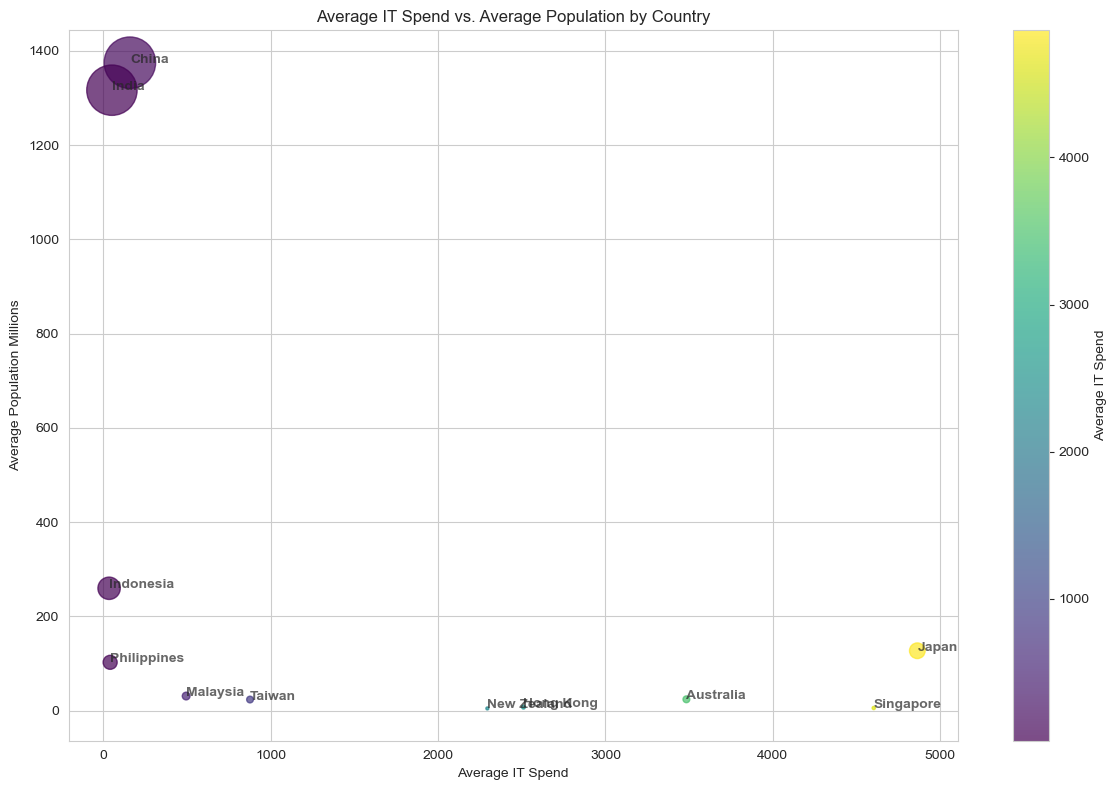

,Country,2015 Populations (Millions),2015 GDP ($ Billions),2015 IT Spend ($ Millions),2016 Populations (Millions),2016 GDP ($ Billions),2016 IT Spend ($ Millions),2015 IT Spend per Capita,2016 IT Spend per Capita,average_it_spend,average_population
0,Australia,24,1349,82651,24,1208,84800,3465,3503,3484,24
1,China,1371,11065,211400,1379,11191,226400,154,164,159,1375
2,Hong Kong,7,309,18154,7,321,18572,2490,2531,2511,7
3,India,1309,2102,68850,1324,2274,67740,53,51,52,1317
4,Indonesia,258,861,8571,261,932,9600,33,37,35,260
5,Japan,127,4395,609000,127,4949,627000,4790,4937,4864,127
6,Malaysia,31,296,14872,31,297,15794,484,506,495,31
7,New Zealand,5,178,10527,5,189,10790,2291,2299,2295,5
8,Philippines,102,293,4063,103,305,4400,40,43,41,103
9,Singapore,6,304,25096,6,310,26200,4534,4672,4603,6


In [33]:
plt.figure(figsize=(12, 8))
dot_size = df['average_population']
color_values = df['average_it_spend']

# Create the scatter plot
scatter = plt.scatter(df['average_it_spend'], df['average_population'], s=dot_size, c=color_values, cmap='viridis', alpha=0.7)

# Add color bar to show the relationship between color and IT spend
cbar = plt.colorbar(scatter)
cbar.set_label('Average IT Spend')

# Annotate the plot with country names (bold and larger font)
for i, country in enumerate(df['Country']):
    plt.annotate(country, (df['average_it_spend'][i], df['average_population'][i]),
                 fontsize=10, fontweight='bold', alpha=0.7)

# Add labels and a title
plt.xlabel('Average IT Spend')
plt.ylabel('Average Population Millions')
plt.title('Average IT Spend vs. Average Population by Country')


# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
df

In [34]:
top3

,Channel Country,Q1-15,Q2-15,Q3-15,Q4-15,Q1-16,Q2-16,Q3-16,Q4-16
0,Australia,9126852,15628393,15505620,10490510,8297715,19008654,13630455,13840018
1,India,7374906,7512036,7179319,6634408,7923857,7945253,8009614,10873627
2,Japan,5442290,6286630,5515913,5376888,7438962,8775265,9120352,8344142


#### we can clearly see that two out of three of the countries that have highest income spend the most money per person in population, hence will recomend to invest in this aspect 

#### look for when sales arent profitable:

In [35]:
sales.fillna(0, inplace=True)
sales['sum_row']=sales.sum(axis=1)

negetive=sales.loc[(sales['sum_row']<0)]
negetive

,Channel Country,Sold to Name,Product Type,Product Sub-type,Product Family,Material Classificat,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount,sum_row
39,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),IP APPLIANCE,APPLIANCE,0,-17980,0,0,0,0,0,0,-17980
43,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),UTM-1 EDGE,APPLIANCE,-1356,0,0,0,0,0,0,0,-1356
44,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),VSX-1,APPLIANCE,0,0,0,0,-16928,0,0,0,-16928
53,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.31 Stand Alone + (ADSL-WIR),SAFE@,APPLIANCE,0,-92,0,0,0,0,0,0,-92
99,Australia,ARROW ECS AUSTRALIA PTY LTD,2.5 SMARTDEFENSE,9.91 Blades credit fees,SMDF CREDIT FEES,SOFTWARE,-44390,-170880,-110297,-118562,-96220,-173309,-160693,-276367,-1150718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,Vietnam,MISOFT JSC,3. SUPPORT,17 CES CREDIT FEES,CES,SOFTWARE,-41,0,-32,-303,0,-3739,0,-2454,-6569
7335,Vietnam,MISOFT JSC,7. SA AGREEMENTS,7.1 REBATE AGREEMENTS,PRODUCT-OTHER,#,0,0,0,0,-19724,0,-7000,0,-26724
7458,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,2.5 SMARTDEFENSE,9.91 Blades credit fees,SMDF CREDIT FEES,SOFTWARE,-2083,-9,-1947,-92,0,0,0,-1341,-5472
7462,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,3. SUPPORT,17 CES CREDIT FEES,CES,SOFTWARE,0,-41,-57,0,0,-4520,-1080,-1135,-6833


#### there are 283 transactions when Checkpoint lost money in, its a good idea to spend more time to investigate these transactions and check what may have caused this 

###  

In [36]:
negetive 

,Channel Country,Sold to Name,Product Type,Product Sub-type,Product Family,Material Classificat,Q1-15 Booked Amount,Q2-15 Booked Amount,Q3-15 Booked Amount,Q4-15 Booked Amount,Q1-16 Booked Amount,Q2-16 Booked Amount,Q3-16 Booked Amount,Q4-16 Booked Amount,sum_row
39,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),IP APPLIANCE,APPLIANCE,0,-17980,0,0,0,0,0,0,-17980
43,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),UTM-1 EDGE,APPLIANCE,-1356,0,0,0,0,0,0,0,-1356
44,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.25 Stand Alone (+HW),VSX-1,APPLIANCE,0,0,0,0,-16928,0,0,0,-16928
53,Australia,ARROW ECS AUSTRALIA PTY LTD,1. PRODUCT,1.31 Stand Alone + (ADSL-WIR),SAFE@,APPLIANCE,0,-92,0,0,0,0,0,0,-92
99,Australia,ARROW ECS AUSTRALIA PTY LTD,2.5 SMARTDEFENSE,9.91 Blades credit fees,SMDF CREDIT FEES,SOFTWARE,-44390,-170880,-110297,-118562,-96220,-173309,-160693,-276367,-1150718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,Vietnam,MISOFT JSC,3. SUPPORT,17 CES CREDIT FEES,CES,SOFTWARE,-41,0,-32,-303,0,-3739,0,-2454,-6569
7335,Vietnam,MISOFT JSC,7. SA AGREEMENTS,7.1 REBATE AGREEMENTS,PRODUCT-OTHER,#,0,0,0,0,-19724,0,-7000,0,-26724
7458,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,2.5 SMARTDEFENSE,9.91 Blades credit fees,SMDF CREDIT FEES,SOFTWARE,-2083,-9,-1947,-92,0,0,0,-1341,-5472
7462,Vietnam,M-SECURITY TECHNOLOGY INDOCHINA,3. SUPPORT,17 CES CREDIT FEES,CES,SOFTWARE,0,-41,-57,0,0,-4520,-1080,-1135,-6833


In [37]:

# Sum of 2015 booked amounts
sum_2015 = negetive[['Q1-15 Booked Amount', 'Q2-15 Booked Amount', 'Q3-15 Booked Amount', 'Q4-15 Booked Amount']].sum().sum()

# Sum of 2016 booked amounts
sum_2016 = negetive[['Q1-16 Booked Amount', 'Q2-16 Booked Amount', 'Q3-16 Booked Amount', 'Q4-16 Booked Amount']].sum().sum()

sum_2015, sum_2016

(-5902449.0, -6011535.0)

###  

### loss of money by country and product type

In [38]:
count_negative = negetive.groupby(['Channel Country', 'Product Type'])['sum_row'].sum().reset_index()
count_negative=count_negative.head(60).sort_values(by='sum_row', ascending=True)
count_negative.reset_index(drop=True)

,Channel Country,Product Type,sum_row
0,Australia,3. SUPPORT,-3309254
1,Australia,2.5 SMARTDEFENSE,-1769028
2,India,3. SUPPORT,-1471579
3,Singapore,3. SUPPORT,-880957
4,New Zealand,3. SUPPORT,-611599
5,New Zealand,2.5 SMARTDEFENSE,-364244
6,Hong Kong,3. SUPPORT,-270578
7,Australia,1. PRODUCT,-253463
8,China,1. PRODUCT,-239749
9,India,1. PRODUCT,-230971


#### out of 5 top losing transactions 4 of them were by support products

In [39]:
negetive['sum_row'].sum()

-11913984.0

### total lost of 11913984.0 dollars

####  i am motivated to understand how many transactions each country comeeted in order to maybe reaveal some further information (for example maybe a country comeeted a small amount of transactions and made allot of money from them- that would be extremly interestin)

###  total transactions per country:

In [40]:
count_table=sales[['Channel Country']]
per_transaction = count_table.groupby('Channel Country').size().reset_index(name='Count of transactions 2015-2016')
per_transaction

,Channel Country,Count of transactions 2015-2016
0,Australia,718
1,China,606
2,Hong Kong,613
3,India,1282
4,Indonesia,379
5,Japan,636
6,Malaysia,357
7,New Zealand,396
8,Philippines,375
9,Singapore,633


###  create aggregate table called per_transaction, merge with booked amount data and calcualte booked amount average:

In [41]:
result['total booked amount 2015 2016']=result.sum(axis=1)
a=per_transaction
b=result[['Country','total booked amount 2015 2016']]
a.rename(columns={'Channel Country': 'Country'}, inplace=True)
per_transaction = pd.merge(a,b,on =['Country'],how ="left")
per_transaction['booked amount per transaction']=per_transaction['total booked amount 2015 2016']/per_transaction['Count of transactions 2015-2016']
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction
0,Australia,718,118719244,165347
1,China,606,30171509,49788
2,Hong Kong,613,31977357,52165
3,India,1282,71384648,55682
4,Indonesia,379,15850180,41821
5,Japan,636,63337997,99588
6,Malaysia,357,8232396,23060
7,New Zealand,396,23735060,59937
8,Philippines,375,10590651,28242
9,Singapore,633,58687158,92713


###  calculate total assigned per country: 

In [42]:
columns_to_sum=[]
for quarter in quarters:
    Booked_col = f'{quarter} Assigned'
    columns_to_sum.append(Booked_col)
    
country_column = 'Country'  # Replace with your actual country column name
columns_to_include = [country_column] + columns_to_sum

# Creating the new DataFrame
expens_agg = merge_roi[columns_to_include]
expens_agg['total assigned 2015 2016']=expens_agg.sum(axis=1)
expens_agg=expens_agg[['Country','total assigned 2015 2016']]
expens_agg

,Country,total assigned 2015 2016
0,Australia,33713223
1,China,10849370
2,Hong Kong,7947816
3,India,10269111
4,Indonesia,765083
5,Japan,16811232
6,Malaysia,80504
7,New Zealand,1879953
8,Philippines,123312
9,Singapore,19228933


###  calcualate total planned per country:

In [43]:
#new test:
columns_to_sum=[]
for quarter in quarters:
    Booked_col = f'{quarter} Plan'
    columns_to_sum.append(Booked_col)
    
country_column = 'Country'  # Replace with your actual country column name
columns_to_include = [country_column] + columns_to_sum

# Creating the new DataFrame
planned_agg = Assigned_vs_planned[columns_to_include]
planned_agg['total planned 2015 2016']=planned_agg.sum(axis=1)
planned_agg=planned_agg[['Country','total planned 2015 2016']]
planned_agg

,Country,total planned 2015 2016
0,Australia,40968180
1,China,11184885
2,Hong Kong,9757614
3,India,8832658
4,Indonesia,831731
5,Japan,16527888
6,Korea,3603499
7,Malaysia,0
8,New Zealand,0
9,Philippines,0


###  

###  merge to per_transaction table:

In [44]:
per_transaction=pd.merge(per_transaction,expens_agg,on =['Country'],how ="right")
per_transaction= pd.merge(per_transaction,planned_agg,on =['Country'],how ="right")
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016
0,Australia,718,118719244,165347,33713223,40968180
1,China,606,30171509,49788,10849370,11184885
2,Hong Kong,613,31977357,52165,7947816,9757614
3,India,1282,71384648,55682,10269111,8832658
4,Indonesia,379,15850180,41821,765083,831731
5,Japan,636,63337997,99588,16811232,16527888
6,Korea,NaN,NaN,NaN,NaN,3603499
7,Malaysia,357,8232396,23060,80504,0
8,New Zealand,396,23735060,59937,1879953,0
9,Philippines,375,10590651,28242,123312,0


###  calculate average head count per country and merge to per_transaction table:

In [45]:
for col in Head_count.columns[1:]:
    Head_count[col] = pd.to_numeric(Head_count[col], errors='coerce')
Head_count['average employees']=Head_count.mean(axis=1)
Head_count.rename(columns={'Employee Country': 'Country'}, inplace=True)
Head_count_for_merge=Head_count[['Country','average employees']]
per_transaction = pd.merge(per_transaction,Head_count_for_merge,on =['Country'],how ="right")
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016,average employees
0,Australia,718,118719244,165347,33713223,40968180,62
1,China,606,30171509,49788,10849370,11184885,38
2,Hong Kong,613,31977357,52165,7947816,9757614,18
3,India,1282,71384648,55682,10269111,8832658,43
4,Indonesia,379,15850180,41821,765083,831731,6
5,Japan,636,63337997,99588,16811232,16527888,37
6,Malaysia,357,8232396,23060,80504,0,3
7,New Zealand,396,23735060,59937,1879953,0,8
8,Philippines,375,10590651,28242,123312,0,2
9,Singapore,633,58687158,92713,19228933,14629638,42


###  clean it spend data, and merge to per_transaction table:

In [46]:
for col in it_spend.columns[1:]:
    it_spend[col] = pd.to_numeric(it_spend[col], errors='coerce')
it_spend1=it_spend[['Country','2015 Populations (Millions)','2016 Populations (Millions)']]
it_spend2=it_spend[['Country','2015 GDP ($ Billions)','2016 GDP ($ Billions)']]
it_spend3=it_spend[['Country','2015 IT Spend ($ Millions)','2016 IT Spend per Capita']]

#_______________________________________________________________________________________________________________________________

it_spend1["average 2016 Populations (Millions) 2015-2016"]=it_spend1.mean(axis=1)
it_spend1=it_spend1[['Country','average 2016 Populations (Millions) 2015-2016']]

it_spend2["GDP ($ Billions) 2015-2016"]=it_spend2.mean(axis=1)
it_spend2=it_spend2[['Country','GDP ($ Billions) 2015-2016']]

it_spend3["IT Spend ($ Millions) 2015-2016"]=it_spend3.mean(axis=1)
it_spend3=it_spend3[['Country','IT Spend ($ Millions) 2015-2016']]

#_______________________________________________________________________________________________________________________________

per_transaction = pd.merge(per_transaction,it_spend1,on =['Country'],how ="right")
per_transaction = pd.merge(per_transaction,it_spend2,on =['Country'],how ="right")
per_transaction = pd.merge(per_transaction,it_spend3,on =['Country'],how ="right")
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016,average employees,average 2016 Populations (Millions) 2015-2016,GDP ($ Billions) 2015-2016,IT Spend ($ Millions) 2015-2016
0,Australia,718,118719244,165347,33713223,40968180,62,24,1279,43077
1,China,606,30171509,49788,10849370,11184885,38,1375,11128,105782
2,Hong Kong,613,31977357,52165,7947816,9757614,18,7,315,10343
3,India,1282,71384648,55682,10269111,8832658,43,1317,2188,34451
4,Indonesia,379,15850180,41821,765083,831731,6,260,897,4304
5,Japan,636,63337997,99588,16811232,16527888,37,127,4672,306969
6,Malaysia,357,8232396,23060,80504,0,3,31,296,7689
7,New Zealand,396,23735060,59937,1879953,0,8,5,183,6413
8,Philippines,375,10590651,28242,123312,0,2,103,299,2053
9,Singapore,633,58687158,92713,19228933,14629638,42,6,307,14884


###  clean table before visualizations:

In [47]:
one_na_mask = per_transaction.isna().sum(axis=1) == 1

# Fill these rows with 0
per_transaction.loc[one_na_mask] = per_transaction.loc[one_na_mask].fillna(0)

# Drop rows with more than one NA
per_transaction.dropna(thresh=len(per_transaction.columns) - 1, inplace=True)
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016,average employees,average 2016 Populations (Millions) 2015-2016,GDP ($ Billions) 2015-2016,IT Spend ($ Millions) 2015-2016
0,Australia,718,118719244,165347,33713223,40968180,62,24,1279,43077
1,China,606,30171509,49788,10849370,11184885,38,1375,11128,105782
2,Hong Kong,613,31977357,52165,7947816,9757614,18,7,315,10343
3,India,1282,71384648,55682,10269111,8832658,43,1317,2188,34451
4,Indonesia,379,15850180,41821,765083,831731,6,260,897,4304
5,Japan,636,63337997,99588,16811232,16527888,37,127,4672,306969
6,Malaysia,357,8232396,23060,80504,0,3,31,296,7689
7,New Zealand,396,23735060,59937,1879953,0,8,5,183,6413
8,Philippines,375,10590651,28242,123312,0,2,103,299,2053
9,Singapore,633,58687158,92713,19228933,14629638,42,6,307,14884


###  calcualte total ROI:

In [48]:
per_transaction['total roi']=per_transaction['total booked amount 2015 2016']/per_transaction['total assigned 2015 2016']*100
per_transaction

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016,average employees,average 2016 Populations (Millions) 2015-2016,GDP ($ Billions) 2015-2016,IT Spend ($ Millions) 2015-2016,total roi
0,Australia,718,118719244,165347,33713223,40968180,62,24,1279,43077,352
1,China,606,30171509,49788,10849370,11184885,38,1375,11128,105782,278
2,Hong Kong,613,31977357,52165,7947816,9757614,18,7,315,10343,402
3,India,1282,71384648,55682,10269111,8832658,43,1317,2188,34451,695
4,Indonesia,379,15850180,41821,765083,831731,6,260,897,4304,2072
5,Japan,636,63337997,99588,16811232,16527888,37,127,4672,306969,377
6,Malaysia,357,8232396,23060,80504,0,3,31,296,7689,10226
7,New Zealand,396,23735060,59937,1879953,0,8,5,183,6413,1263
8,Philippines,375,10590651,28242,123312,0,2,103,299,2053,8588
9,Singapore,633,58687158,92713,19228933,14629638,42,6,307,14884,305


In [49]:
data=per_transaction

###  

###  PLANNED VS ASSIGNED:

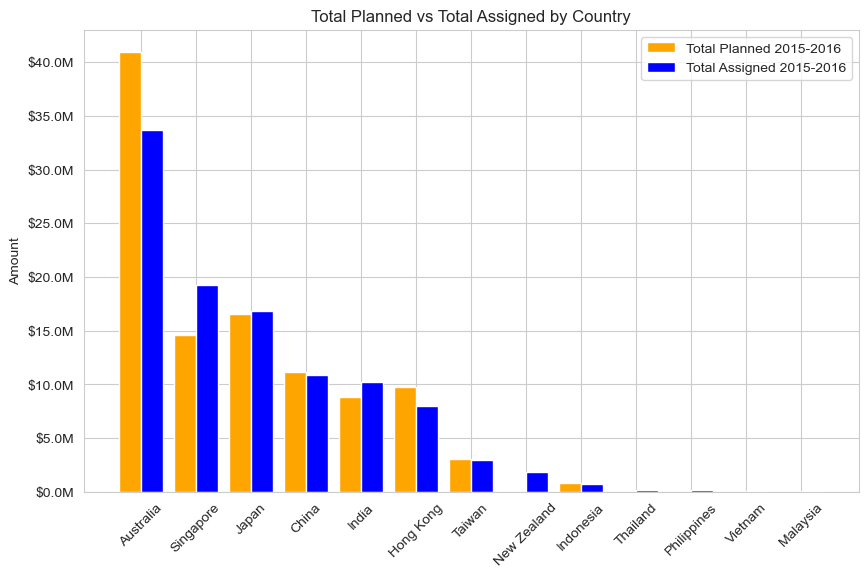

In [50]:
data.sort_values(by='total assigned 2015 2016', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))

# Set the positions for the bars
positions = range(len(data['Country']))
bar_width = 0.4  # Width of the bars

# Plot 'total planned 2015 2016' in orange
plt.bar([p - bar_width/2 for p in positions], 
        data['total planned 2015 2016'], 
        width=bar_width, 
        label='Total Planned 2015-2016', 
        color='orange')

# Plot 'total assigned 2015 2016' in blue
plt.bar([p + bar_width/2 for p in positions], 
        data['total assigned 2015 2016'], 
        width=bar_width, 
        label='Total Assigned 2015-2016', 
        color='blue')

# Set the country names as x-ticks
plt.xticks(positions, data['Country'], rotation=45)

# Adding labels and title
plt.ylabel('Amount')
plt.title('Total Planned vs Total Assigned by Country')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

###  

###  total booked amount by country:

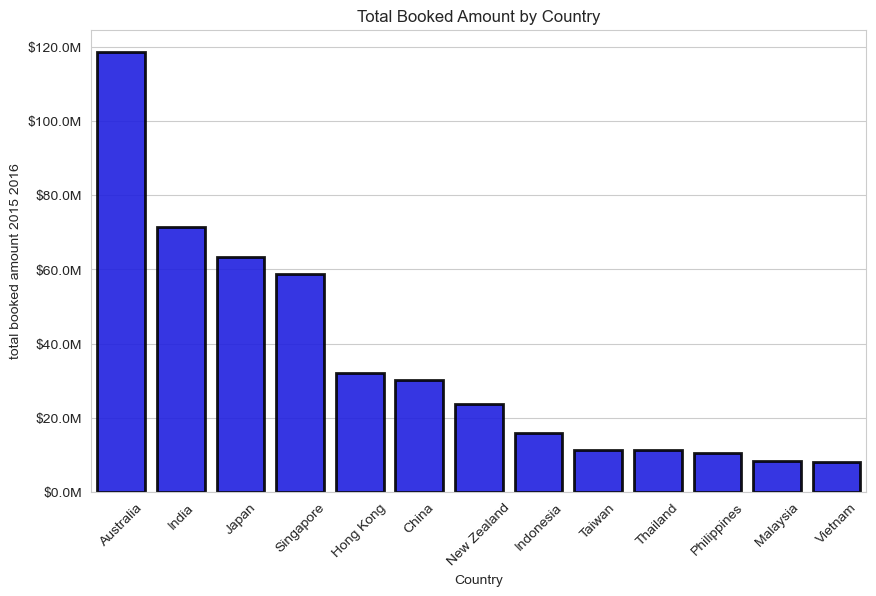

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='total booked amount 2015 2016', data=data.sort_values(by='total booked amount 2015 2016', ascending=False),color='blue',alpha=0.9,linewidth=2, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Total Booked Amount by Country')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [52]:
data

,Country,Count of transactions 2015-2016,total booked amount 2015 2016,booked amount per transaction,total assigned 2015 2016,total planned 2015 2016,average employees,average 2016 Populations (Millions) 2015-2016,GDP ($ Billions) 2015-2016,IT Spend ($ Millions) 2015-2016,total roi
0,Australia,718,118719244,165347,33713223,40968180,62,24,1279,43077,352
9,Singapore,633,58687158,92713,19228933,14629638,42,6,307,14884,305
5,Japan,636,63337997,99588,16811232,16527888,37,127,4672,306969,377
1,China,606,30171509,49788,10849370,11184885,38,1375,11128,105782,278
3,India,1282,71384648,55682,10269111,8832658,43,1317,2188,34451,695
2,Hong Kong,613,31977357,52165,7947816,9757614,18,7,315,10343,402
11,Taiwan,517,11415897,22081,2941801,3022156,11,24,528,10648,388
7,New Zealand,396,23735060,59937,1879953,0,8,5,183,6413,1263
4,Indonesia,379,15850180,41821,765083,831731,6,260,897,4304,2072
12,Thailand,426,11282976,26486,146550,0,4,69,407,0,7699


In [53]:
correlation = data['average employees'].corr(data['booked amount per transaction'])
print("Correlation:", correlation)

Correlation: 0.8391315229323784


###  

###  Booked Amount per Transaction as a Function of Average Employees:

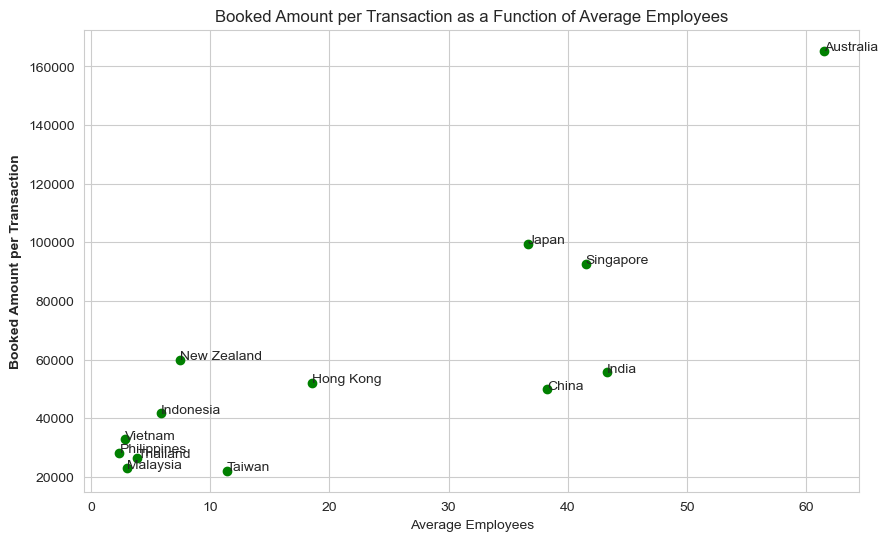

In [54]:
plt.figure(figsize=(10, 6))

# Creating a scatter plot
plt.scatter(data['average employees'], data['booked amount per transaction'], color='green')

# Adding labels and title
plt.xlabel('Average Employees')
plt.ylabel('Booked Amount per Transaction',fontweight ='bold')
plt.title('Booked Amount per Transaction as a Function of Average Employees')

for index, row in data.iterrows():
    plt.annotate(row['Country'], (row['average employees'], row['booked amount per transaction']))

plt.show()

###  

###  Total ROI as a Function of GDP ($ Billions) 2015-2016:

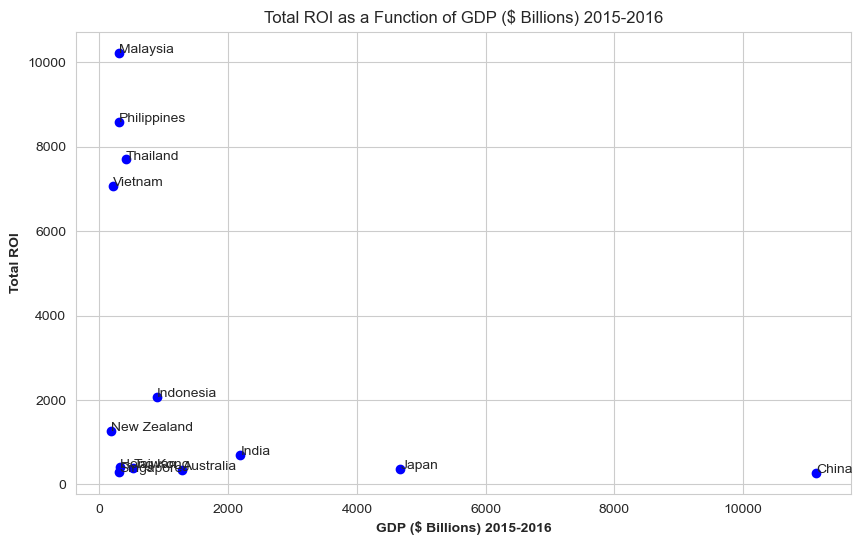

In [55]:
plt.figure(figsize=(10, 6))

# Creating a scatter plot
plt.scatter(data['GDP ($ Billions) 2015-2016'], data['total roi'], color='blue')

# Adding labels and title
plt.xlabel('GDP ($ Billions) 2015-2016', fontweight='bold')
plt.ylabel('Total ROI', fontweight='bold')
plt.title('Total ROI as a Function of GDP ($ Billions) 2015-2016')

# Optionally, adding annotations for each point
for index, row in data.iterrows():
    plt.annotate(row['Country'], (row['GDP ($ Billions) 2015-2016'], row['total roi']))

plt.show()

###  

###  total booked amount as function of planned:

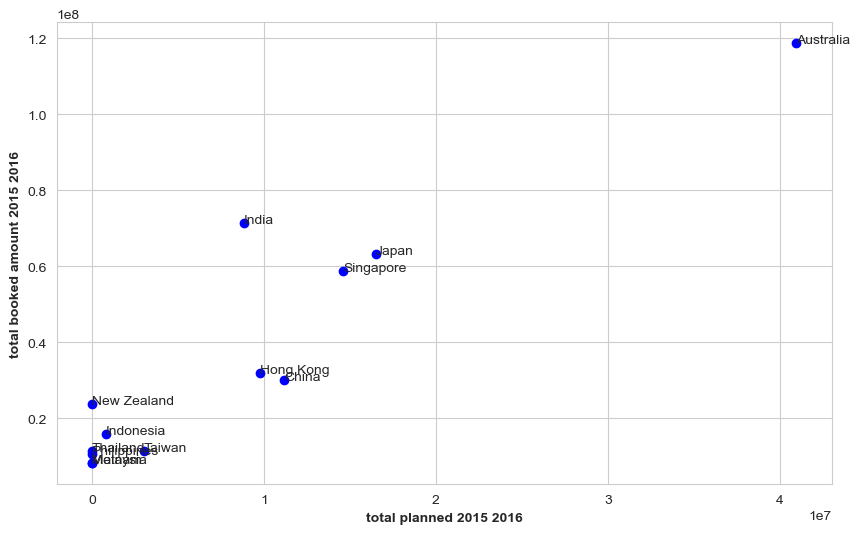

In [56]:
plt.figure(figsize=(10, 6))

# Creating a scatter plot
plt.scatter(data['total planned 2015 2016'], data['total booked amount 2015 2016'], color='blue')

# Adding labels and title
plt.xlabel('total planned 2015 2016', fontweight='bold')
plt.ylabel('total booked amount 2015 2016', fontweight='bold')
#plt.title('Total ROI as a Function of GDP ($ Billions) 2015-2016')

# Optionally, adding annotations for each point
for index, row in data.iterrows():
    plt.annotate(row['Country'], (row['total planned 2015 2016'], row['total booked amount 2015 2016']))

plt.show()